<a href="https://colab.research.google.com/github/pletalk/EMPV1-RPI-DonkeyCar/blob/main/Donkey_Car_Training_using_Google_Colab_KR_Edition_1_13_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colaboratory를 활용한 동키카 학습을 위한 단계별 가이드

@2020-11-13/Ignitespark

Google에서 지원하는 Colaboratory 환경에서 Donkey의 주행 영상데이타를 활용해서 신경회로망의 학습을 단계적으로 수행하도록 안내하는 노트북입니다.

원할한 수행을 위해서 메뉴의 런타임 > 런타임 유형변경에서 GPU/TPU를 선택해 주세요.

*(Reference)* 

본 코드는 Sachindroid8님이 작성하신 Google Colaboratory기반의 Donkey Training 주피터 노트북에 기반하여 내용을 한글화하고, 교육에 필요한 내용을 추가하여 확장하였습니다. Sachindroid8님이 작성하신 Git의 코드 주소는 아래와 같습니다.

https://github.com/sachindroid8/self-driving-car-using-google-colab

<변경내용>
* 11-11
    * Tensorflow 1.15.2버전 지원
    * Donkeycar 3.1.5버전 지원
    * Donkeycar의 validation_step설정을 위해서 cfg.BATCH_SIZE=64로 변경(디폴트: 128)
*08-01 
    * Tensorflow설치(2.0alpha)코드 삭제 -> 현재 2.2버전지원
    * 수행코드 일부변경

<실행을 위한 참고사항>
* donkeycar의 학습을 위해서 Tensorflow의 버전을 1.15.2로 설정합니다. 
* Google Colab의 학습환경과 PC/노트북의 Tensorflow환경을 맞추도록 합니다.
* PC/노트북의 경우, pip install tensorflow==1.15.2 를 수행하도록 합니다.

<참고>
* donkeycar visualization - https://colab.research.google.com/github/uwesterr/MlFastAiBlog/blob/master/_notebooks/2020-03-01-TrainDonkeyCar.ipynb

# 0 > Google Colaboratory를 사용하기 전에 알아두어야할 사항들

Google Colaboratory는 구글이 지원하는 머신러닝 및 데이타처리를 위한 무료 서비스 플랫폼입니다. Google Colaboratory에서는 고성능의 GPU를 제공하여 머신러닝의 학습속도를 빠르게 수행할 수 있는 우수한 기능을 제공하고 있습니다. 이런 기능들을 활용하는데 있어서 반드시 알아두어야할 사항들은 아래와 같습니다.


* Google Colaboratory는 12시간 동안만 사용 가능합니다. 사용자가 프로그램 수행을 위한 노트를 개설하고 수행하는데 있어서 최대 12시간 이내에서만 사용할 수 있습니다. Google Colaboratory는 12시간이 지나면 개인에게 할당했던 모든 컴퓨팅 자원(CPU,메모리,GPU등)을 리셋(재설정)합니다.

* 12시간 이내라도 80분간 사용하지 않으면, 개인에게 할당했던 모든 컴퓨팅 자원(CPU,메모리,GPU등)을 리셋(재설정)합니다.

* 할당된 자원이 리셋(재설정)되었다고 다시 사용하지 못하는 것은 아닙니다. 개인의 구글 드라이브에 저장된 Google Laboratory에서 작성한 주피터 노트북을 다시 로드하고 프로젝트를 새로이 시작하면 됩니다. 또 다른 12시간의 개발과 테스팅 시간이 시작됩니다.

* Google Laboratory에서 수행한 내용들은 주피터 노트북에 과정과 내용을 기록하여 재 사용가능하도록 합니다. 생성하거나 사용한 노트북은 개인의 구글 드라이브에 파일로 저장이 가능합니다.

# 1 > Google Colaboratory의 컴퓨팅 환경

구글의 Colaboratory에서 지원되는 기본적인 컴퓨팅 환경의 다양한 정보들을 통해 성능을 확인해봅니다.

## 1.1 OS 확인하기

In [ ]:
! cat /etc/issue.net

Ubuntu 18.04.5 LTS


## 1.2 Google Colaboratory GPU 정보보기

In [ ]:
! nvidia-smi

Wed Nov 11 00:44:34 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1.3 메모리 용량 파악하기

In [ ]:
! cat /proc/meminfo

MemTotal:       13333552 kB
MemFree:        10785108 kB
MemAvailable:   12520668 kB
Buffers:           78176 kB
Cached:          1807680 kB
SwapCached:            0 kB
Active:           619248 kB
Inactive:        1654644 kB
Active(anon):     356112 kB
Inactive(anon):      348 kB
Active(file):     263136 kB
Inactive(file):  1654296 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               340 kB
Writeback:             0 kB
AnonPages:        388128 kB
Mapped:           206468 kB
Shmem:               956 kB
Slab:             158372 kB
SReclaimable:     117976 kB
SUnreclaim:        40396 kB
KernelStack:        3792 kB
PageTables:         5236 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666776 kB
Committed_AS:    2614928 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              952 kB
AnonHugePages:   

## 1.4 CPU 정보 파악하기

In [ ]:
! cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.000
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

# 2 > 텐서플로우 1.X으로 업데이트하기
텐서플로우(tensorflow)와 Keras의 설치 버전을 확인합니다.

In [ ]:
!pip install tensorflow==1.13.1
!pip install tensorflow-gpu==1.13.1

     |████████████████████████████████| 92.5MB 34kB/s 
     |████████████████████████████████| 51kB 8.5MB/s 
     |████████████████████████████████| 3.2MB 55.8MB/s 
     |████████████████████████████████| 368kB 51.3MB/s 
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0
     |████████████████████████████████| 345.2MB 45kB/s 


In [ ]:
#%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
#import keras
import tensorflow as tf
print(tf.__version__)

1.13.1


# 3 > GPU 할당 체크하기
"Found GPU at: / device: GPU: 0"이 표시되면, GPU가 이미 사용중이라는 의미입니다.

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# 4 > Donkeycar 프로그램 설치 (3.1.5)

* 2020-11-11일자 기준 3.15버전을 설치 

* Donkeycar의 영상데이타 기반의 학습프로그램을 활용하기 위해서 Donkeycar의 프로그램들을 Google Colaboratory에 설치해야 합니다.

* Git에 저장되어 있는 Donkeycar 프로그램 저장소에서 관련 소스코드를 가져와서 Google Colaboratory에 폴더를 생성하고 해당 소스코드를 복사하여 설치합니다.

In [ ]:
!git clone https://github.com/autorope/donkeycar
%cd donkeycar
!git checkout master

Cloning into 'donkeycar'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 13814 (delta 1), reused 3 (delta 0), pack-reused 13801
Receiving objects: 100% (13814/13814), 81.56 MiB | 42.70 MiB/s, done.
Resolving deltas: 100% (8715/8715), done.
/content/donkeycar
Branch 'master' set up to track remote branch 'master' from 'origin'.
Switched to a new branch 'master'


### (Q) 저장된 Donkeycar 소스코드는 어디에 ?

Git에서 가져온 코드들은 Google Colaboratory의 탐색창의 상단의 파일 메뉴를 클릭하면 설치된 소스코드의 디렉토리를 아래와 같이 확인이 가능합니다.

* Google Colaboratory의 파일은 /content 아래에 위치합니다.

![DonkeyCar Git Source Codes Folder](https://api.monosnap.com/file/download?id=Apc4BB8AwlJ1tryBBykAzdnxvAwTw1)

* 사용자가 /content 디렉토리 아래에 mydata라는 새로운 디렉토리(폴더)를 생성했다면, 실제 Google Colaboratory에서는 /content/mydata 라는 폴더가 생성됩니다.

## 4.1 DonkeyCar 프로그램 설치하기

DonkeyCar 프로그램 소스코드가 저장된 donkey폴더 내의 setup.py 파일을 사용해서 설치를 진행합니다.

In [ ]:
!pip install -e .[pc]

Obtaining file:///content/donkeycar
     |████████████████████████████████| 102kB 7.1MB/s 
  Created wheel for paho-mqtt: filename=paho_mqtt-1.5.1-cp36-none-any.whl size=61544 sha256=672152c104b448fe00bf9ac7370404054aed813d7b6c19c0d51c5c4c0f91b68e
  Stored in directory: /root/.cache/pip/wheels/75/e2/f5/78942b19b4d135605e58dfe85fba52253b14d636aabf76904b
Successfully built paho-mqtt
  Running setup.py develop for donkeycar


In [ ]:
!pip list | grep tensorflow

tensorflow                    1.13.1          
tensorflow-addons             0.8.3           
tensorflow-datasets           4.0.1           
tensorflow-estimator          1.13.0          
tensorflow-gcs-config         2.3.0           
tensorflow-gpu                1.13.1          
tensorflow-hub                0.10.0          
tensorflow-metadata           0.24.0          
tensorflow-privacy            0.2.2           
tensorflow-probability        0.11.0          


## 4.2 DonkeyCar 프로젝트 생성하기

DonkeyCar에 대한 나만의 프로젝트를 새로이 생성합니다. 프로젝트를 생성하기 위해서는 프로젝트 이름이 필요합니다. 여기서는 mycar라는 프로젝트명을 사용합니다. Donkeycar의 프로젝트 생성 형식은 다음과 같습니다.

$ donkey createcar --path /content/mycar [enter]

In [ ]:
!donkey createcar --path /content/mycar

using donkey v3.1.5 ...
Creating car folder: /content/mycar
making dir  /content/mycar
Creating data & model folders.
making dir  /content/mycar/models
making dir  /content/mycar/data
making dir  /content/mycar/logs
Copying car application template: complete
Copying car config defaults. Adjust these before starting your car.
Copying train script. Adjust these before starting your car.
Copying calibrate script. Adjust these before starting your car.
Copying my car config overrides
Donkey setup complete.


### (Q) 생성된 mycar 프로젝트는 어디에 ?

탐색창의 파일을 클릭하면, 다음과 같이 /content 디렉토리 아래에 mycar폴더가 새롭게 생성되었다는 것을 확인할 수 있습니다. mycar폴더에는 3개의 폴더와 4개의 파이썬 파일이 생성됩니다.

![Donkeycar User-Defined Project Folder](https://api.monosnap.com/file/download?id=yMcfRjpwpEpeZIkCqiq2nfX7ihdFjX)

## 4.3 라즈베리파이의 주행데이타를 Google Colaboratory로 이동 준비(PC/노트북)

* 라즈베리파이에 저장된 주행 영상데이타는 프로젝트 파일 폴더(예를 들어 mycar라고 가정) 아래에 data 폴더 아래에 tub_라는 이름을 시작하는 폴더에 순차번호를 붙여서 저장되어 있습니다. 예를들어, 폴더명이 tub_1_19-11-09라면, 11월 09일에 주행한 첫번째 주행영상이라는 의미로 해석이 가능합니다(~/mycar/data/tub_1_19-11-09).

* 주행데이타는 개별(1회분의 주행영상)은 물론이고 여러개의 풀더(여러번의 주행영상들)을 모두 학습에 활용할 수 있기때문에 우선 PC로 모두 이동하여 저장하는 방법이 유용합니다.

* 본 워크샵에서는 Paragon S/W의 extFS for Windows 소프트웨어를 사용해서 라즈베리파이의 SD카드로부터 프로젝트 폴더내 data폴더내의 tub_폴더 데이타를 PC/노트북으로 바로 복사할 수 있습니다. 

* 라즈베리파이 SD카드로부터 폴더 단위의 복사를 완료했다면, tub_ 폴더들을 Google Laboratory로 업로드하기 위해서 zip으로 묶고, 압축된 파일을 Google Laboratory로 업로드합니다.

![Alt text](https://monosnap.com/image/cLWMOMwqgzhLhg2io0DgSBaov7NWKb)

## 4.4 Data.zip을 노트북/PC에서 Google Colaboratory로 업로드하기

#### PC/노트북에서 압축된 주행데이타 파일을 업로드 하기 위한 수행코드는 아래와 같습니다.

업로드할 파일은 data.tar.gz 파일명을 가지며, 해당 파일이 업로드되면 아래의 수행코드에 따라 data.tar.gz파일이 mycar 폴더에 위치하게 되며, 자동적으로 압축이 해제되어 설치됩니다.

In [ ]:
import os
from google.colab import files
import shutil

WORK_FOLDER = "/content/mycar/data"
if(os.path.exists(WORK_FOLDER) == True):  
    shutil.rmtree('/content/mycar/data')
os.makedirs(WORK_FOLDER)

In [ ]:
%pwd

'/content/donkeycar'

In [ ]:
%cd "/content/mycar"

/content/mycar


In [ ]:
uploaded = files.upload()

Saving data.tar.gz to data.tar.gz


In [ ]:
#! gzip -cd data.tar.gz | tar xvf -

In [ ]:
#
#데이타에서 히든파일들이 존재하는 경우 삭제
#

#%cd data
#%cd tub_1_20-11-13
#!rm \._*

/content/mycar/data


In [ ]:
%ls -a

1000_cam-image_array_.jpg  363_cam-image_array_.jpg   record_231.json
1001_cam-image_array_.jpg  3640_cam-image_array_.jpg  record_2320.json
1002_cam-image_array_.jpg  3641_cam-image_array_.jpg  record_2321.json
1003_cam-image_array_.jpg  3642_cam-image_array_.jpg  record_2322.json
1004_cam-image_array_.jpg  3643_cam-image_array_.jpg  record_2323.json
1005_cam-image_array_.jpg  3644_cam-image_array_.jpg  record_2324.json
1006_cam-image_array_.jpg  3645_cam-image_array_.jpg  record_2325.json
1007_cam-image_array_.jpg  3646_cam-image_array_.jpg  record_2326.json
1008_cam-image_array_.jpg  3647_cam-image_array_.jpg  record_2327.json
1009_cam-image_array_.jpg  3648_cam-image_array_.jpg  record_2328.json
100_cam-image_array_.jpg   3649_cam-image_array_.jpg  record_2329.json
1010_cam-image_array_.jpg  364_cam-image_array_.jpg   record_232.json
1011_cam-image_array_.jpg  3650_cam-image_array_.jpg  record_2330.json
1012_cam-image_array_.jpg  3651_cam-image_array_.jpg  record_2331.json
1013_cam

In [ ]:
# 압축을 해제하고, tar 파일을 풀기
! gzip -cd data.tar.gz | tar xvf -

gzip: data.tar.gz: No such file or directory
tar: This does not look like a tar archive
tar: Exiting with failure status due to previous errors


## 4.4 PC/노트북에서 업로드된 data.tar.gz파일 삭제하기

업로드된 data.zip파일을 삭제하여 tub_ 폴더만이 data폴더 안에 위치하도록 합니다.

In [ ]:
!rm /content/mycar/data.tar.gz

# 5> Donkeycar 주행영상데이타를 활용한 자율주행모델 학습하기

동키카에서 지원되는 학습모듈을 사용해서 주행영상 데이타 기반의 인공지능 학습을 진행합니다. CNN(Convolution Neural Network)기반의 이미지 식별을 통한 모델 학습으로 주행영상과 실제 주행시 함께 획득한 속도와 주행방향에 대한 데이타를 입력으로 하여 주행 모델을 학습하게 됩니다.

* tub_ 디렉토리가 적은 경우, 학습이 되지 않습니다. 최소 10개이상의 주행을 하고 학습하세요.

In [ ]:
!python /content/mycar/train.py

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

[주의] 

*   학습데이타가 128개보다 작은 경우, 오류가 발생(validation_step에서 오류발생)
*   위의 경우, config.py파일의 BATCH_SIZE를 총 데이타갯수보다 작게 설정(e.g) BATCH_SIZE=64



In [ ]:
#
# 학습을 위한 데이타는 /data 디렉토리 아래의 tub_ 이름의 폴더에서 자동으로 가져와서 학습을 수행
#
!python /content/mycar/train.py --model /content/mycar/models/mypilot.h5

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

# 6> 학습한 모델 PC/노트북에 다운로드 하기

* Google Colaboratory의 탐색창에서 파일 섹션으로 이동합니다. 

* Google Colaboratory에서 학습한 모델을 저장하고 있는 디렉토리(models)를 클릭하고 이동합니다. 사용자의 프로젝트 폴더가 mycar라면, mycar/models 디렉토리에 학습한 인공지능 모델이 저장되어 있습니다.

* 학습한 모델은 확장자로 *.h5를 사용합니다. 다운로드할 모델파일을 선택하고, 마우스의 오른쪽 버튼을 누르면 선택한 파일의 '다운로드' 메뉴항목이 표시됩니다. 해당 항목을 선택하면 노트북/PC에 모델을 다운로드 할 수 있습니다.


![Alt text](https://monosnap.com/image/XpGITFyzwgkqjNI7c40fsv91KRpTqw)

* 학습한 모델을 저장한 폴더에는 저장된 모델명 파일(여기서는 mypolot.h5)의 학습과정동안 계산된 loss(손실)과 정확도(accurracy)에 대한 값을 그래프로 표현한 png파일도 함께 저장되어 있습니다. 결과값에 대한 파일명은 "모델명_loss_acc_정확도실수값.png"의 형식으로 표현됩니다.

<img src="https://monosnap.com/image/Xrnv8MfkNS8opa46LAcNvuHnmHPu9Q" width="480" height="320" />

### <모델디렉토리에 생성된 png파일의 이름 변경하여 표시하기>

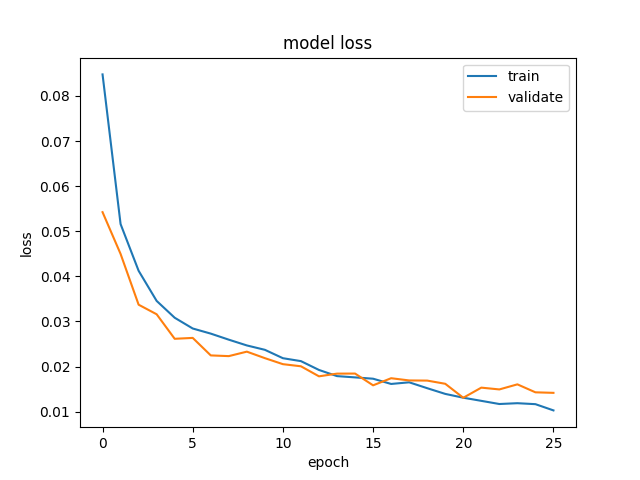

In [ ]:

# 학습과정의 손실-인식율 그래프로 표시
# models 디렉토리에 *.png파일로 저장

from IPython.display import Image
import os

models_dir = '/content/mycar/models'

acc_loss_filepath = 'mypilot.h5_loss_acc_0.013080.png'

filename = os.path.join(models_dir, acc_loss_filepath)
Image(filename=filename)

# 7> 자율주행모드로 동키카 운행하기

* PC/노트북에 다운로드한 인공지능 모델(*.h5)를 폴더에 저장합니다.

* 저장이 완료된 모델을 탑재한 라즈베리파이 SD카드를 동키카에 적재하고 동키카에 전원을 넣어 부팅합니다.

* 노트북/PC에서 SSH로 동키카에 접속한 후, 아래의 명령을 입력하여 자율주행 모드로의 실행을 설정합니다.

```
# 동키카에 탑재된 라즈베리파이에서 수행할 코드

$cd mycar [enter]
$python manage.py drive --model /mycar/models/mypilot.h5 [enter]
```






## 8> PC에 설치된 Donkeycar 시뮬레이터에서 학습된 모델 작동시키기

<참고>
동키카 시뮬레이터 사용에 대해서는 아래의 링크를 참고하세요.
* https://docs.donkeycar.com/guide/simulator/

1. PC/Notebook에 설치된 simulator의 디렉토리로 이동합니다. 시뮬레이터 구동을 위한 동키카 프로젝트 폴더를 생성했다면, 해당디렉토리로 이동합니다(여기서는 ~/mysim으로 가정)
2. 해당 디렉토리로 이동해서 simulator를 구동합니다.
    * mysconfig.py파일에서 DONKEY_SIM_PATH가 시뮬레이터의 경로를 잘 설정하고 있는지 확인 부탁드립니다.
3. 학습된 자율주행모델(*.h5)를 ~/mysim 디렉토리 아래의 models 디렉토리에 복사합니다.
4. 아래의 명령어를 입력해서 자율주행을 실행합니다.
    * ```$python manage.py drive --model models/mypilot.h5 ```    
5. 유니티(Unity) 시뮬레이터창이 표시되고, 터미널에서 localhost:8887 접속에 대한 내용이 안내되면 웹브라우져를 실행하고 시뮬레이터에 접속합니다.
6. 표시되는 웹 브라우져내의 drive창에서 아래의 Mode&Pilot의 Local Pilot으로 설정하면 자동주행을 합니다.

![시뮬레이터 자율주행 설정](https://api.monosnap.com/file/download?id=PLU9FFdile460iwnUUCNvgdHKDLhHT)